In [1]:
import pandas as pd

performance_data = pd.read_csv('performance_data.csv')
submission_template = pd.read_csv('submission_template.csv')
weather_data = pd.read_csv('weather_data.csv')

In [2]:
performance_data.head()

,HYBRID_ID,ENV_ID,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,PLANT_DATE,HARVEST_DATE,...,ENV_YIELD_STD,ELEVATION,CLAY,SILT,SAND,AWC,PH,OM,CEC,KSAT
0,H2782,Env_1,0,0,107.9577,2008,49.5,-98.0,2008-05-06,2008-11-03,...,7.591866,870.65,22.7,23.0,54.5,18.65,7.2,6.1,24.2,9.4
1,H2782,Env_2,0,0,85.7498,2008,49.3,-98.1,2008-05-14,2008-10-22,...,7.184953,942.41,22.7,22.0,55.8,18.75,7.3,6.9,25.2,10.2
2,H2240,Env_3,0,0,74.6116,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9
3,H1527,Env_3,0,0,83.8191,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9
4,H1369,Env_3,0,0,81.7917,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9


In [3]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 22 columns):
HYBRID_ID         387427 non-null object
ENV_ID            387427 non-null object
HYBRID_MG         387427 non-null int64
ENV_MG            387427 non-null int64
YIELD             387427 non-null float64
YEAR              387427 non-null int64
LAT               387427 non-null float64
LONG              387427 non-null float64
PLANT_DATE        387427 non-null object
HARVEST_DATE      387427 non-null object
IRRIGATION        379143 non-null object
ENV_YIELD_MEAN    387427 non-null float64
ENV_YIELD_STD     387427 non-null float64
ELEVATION         387427 non-null float64
CLAY              387427 non-null float64
SILT              387427 non-null float64
SAND              387427 non-null float64
AWC               387427 non-null float64
PH                387427 non-null float64
OM                387427 non-null float64
CEC               387427 non-null float64
KSAT              

In [4]:
performance_data.describe()

,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,ENV_YIELD_MEAN,ENV_YIELD_STD,ELEVATION,CLAY,SILT,SAND,AWC,PH,OM,CEC,KSAT
count,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000
mean,5.132190,5.480511,120.738228,2012.781236,41.661369,-91.262012,120.291649,13.378154,1159.748470,24.429210,48.748303,26.796305,23.715754,6.397536,5.556450,25.454481,2.367292
std,1.707665,1.800359,21.995931,2.602693,2.360795,5.839294,17.447066,2.975853,702.488253,4.136108,10.626200,12.379756,2.083614,0.375251,2.223076,3.704428,1.672286
min,0.000000,0.000000,6.031800,2008.000000,26.100000,-104.900000,28.077529,2.807647,-2.500000,6.800000,9.300000,0.000000,11.400000,4.700000,1.600000,8.033333,0.500000
25%,4.000000,4.000000,107.817400,2011.000000,40.300000,-95.200000,109.749895,11.588648,754.390000,21.800000,40.500000,17.200000,22.500000,6.200000,4.000000,23.200000,1.200000
50%,5.000000,6.000000,122.128700,2013.000000,41.500000,-91.900000,121.749200,12.949489,1004.810000,24.700000,48.300000,27.000000,24.000000,6.300000,5.000000,25.700000,1.800000
75%,7.000000,7.000000,135.356250,2015.000000,43.300000,-87.600000,131.434895,15.037107,1278.860000,27.200000,57.500000,35.700000,25.350000,6.600000,6.900000,27.700000,3.100000
max,8.000000,9.000000,230.607000,2017.000000,49.500000,-71.500000,181.664953,41.182394,4905.310000,39.500000,72.800000,83.300000,28.250000,7.900000,20.300000,43.200000,14.700000



# Performance Data
## Variable	---->	Explanation	<>	Notes	<br>

HYBRID_ID	---->	Identifier for the tested hybrid			<br>
ENV_ID	---->	Identifier for the tested location and year, used to join to weather_data			<br>
HYBRID_MG	---->	Maturity group of the tested hybrid			<br>
ENV_MG	---->	Typical maturity group of the tested location	<>	Maturity of location is a long term average; depending on the weather in any particular year, the true maturity group of the location could be higher or lower than what it is on average	<br>
YIELD	---->	Yield of the tested hybrid in tested location (quintiles/hectare)			<br>
YEAR	---->	Year grown			<br>
LAT	---->	Latitude of location rounded to nearest .1 degree			<br>
LONG	---->	Longitude of location rounded to nearest .1 degree			<br>
PLANT_DATE	---->	Date the hybrid was planted			<br>
HARVEST_DATE	---->	Date the hybrid was harvested			<br>
IRRIGATION	---->	Level of irrigation in this location	<>	"Whether field was irrigated:
NULL – unknown irrigation
NONE or DRY – no irrigation
ECO – very light irrigation
LIRR – light irrigation
IRR – normal irrigation"	<br>
ENV_YIELD_MEAN	---->	Average yield in this environment 			<br>
ENV_YIELD_STD	---->	Standard deviation of yield in this environment			<br>
ELEVATION	---->	Elevation of field			<br>
CLAY	---->	% of clay in soil	<>	% clay, sand, and silt added together equals 1	<br>
SILT	---->	% of silt in soil			<br>
SAND	---->	% of sand in soil			<br>
AWC	---->	Available water capacity in soil			<br>
PH	---->	pH of soil			<br>
OM	---->	Organic matter in soil			<br>
CEC	---->	Cation exchange capacity of soil			<br>
KSAT	---->	Saturated hydraulic conductivity of soil			<br>

# Weather Data
## Variable	---->	Explanation	<>	Notes	<br>
ENV_ID	---->	Identifier for the tested location and year, used to join to weather_data			<br>
DAY_NUM	---->	Day number within year of weather variables	<>	Value of 1 indicates January 1, 365 indicates December 31 (non-leap years)	<br>
DAYL	---->	Day length (seconds)			<br>
PREC	---->	Precipitation (mm)			<br>
SRAD	---->	Solar radiation (W/m^2)			<br>
SWE	---->	Snow water equivalent (kg/m^2)			<br>
TMAX	---->	Maximum temperature (degrees Celsius)			<br>
TMIN	---->	Minimum temperature (degrees Celsius)			<br>
VP	---->	Vapor pressure (Pa)			<br>
# Classifier Template
## Variable	---->	Explanation	<>	Notes	<br>
HYBRID_ID	---->	Identifier for tested hybrid			<br>
HEAT_RES	---->	Flag for whether hybrid is resistant to heat as you define it in objective #1	<>	Define resistant as 1, susceptible as 0; if you defined multiple metrics in objective #1, you may split this column or combine the results as you see fit (i.e. HEAT_RES_1, HEAT_RES_2)	<br>
DROUGHT_RES	---->	Flag for whether hybrid is resistant to drought as you define it in objective #1	<>	Define resistant as 1, susceptible as 0; if you defined multiple metrics in objective #1, you may split this column or combine the results as you see fit	<br>
HEAT_DROUGHT_RES	---->	Flag for whether hybrid is resistant to heat+drought as you define it in objective #1	<>	Define resistant as 1, susceptible as 0; if you defined multiple metrics in objective #1, you may split this column or combine the results as you see fit	<br>


## Geojson map based on the coordenates of performance_data

In [5]:
# Import modules
import geojsonio
import json

# Get data for map
map_data = performance_data.groupby(by=['LONG','LAT']).size()
map_df = pd.DataFrame(map_data)
map_df = map_df.reset_index()
map_df.columns = ['LONG','LAT','COUNT']

# Build geojson dictionary    
map_geojson = { "type" : "FeatureCollection",
           "features": []}
for i in range(len(map_df)):
    dict_iter = {'type':'Feature',
                'geometry':{'type':'Point','coordinates':[map_df.iloc[i]['LONG'],map_df.iloc[i]['LAT']]},
                'properties':{'crop count':map_df.iloc[i]['COUNT']}}
    map_geojson['features'].append(dict_iter)

# Set up a map
geojsonio.display(json.dumps(map_geojson))

# Additionally, we could do a heatmap on the conditions

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-104.9%2C%2040.3%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20618.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-104.8%2C%2040.4%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20375.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-104.7%2C%2040.3%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20214.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feature%22%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-103.4%2C%2041.8%5D%7D%2C%20%22properties%22%3A%20%7B%22crop%20count%22%3A%20319.0%7D%7D%2C%20%7B%22type%22%3A%20%22Feat

## Correlation heatmap
There are no strong correlations between weather conditions and yield if we look at the aggregated data. We can conclude we'll have to go one level deeper and do the analysis on every specific Hybrid_ID

In [6]:
# Import modules
import seaborn as sns
import numpy as np

# Extract average weather metrics for every ENV_ID
weather_grouped = weather_data.groupby(by='ENV_ID').mean()
weather_grouped = weather_grouped.drop('DAY_NUM', axis='columns')

# Join dataframes on 'ENV_ID'
joined_df = performance_data.join(weather_grouped,on='ENV_ID')

# Prepare dataframe to redo correlation matrix
joined_df_drop = joined_df.drop(['HYBRID_ID','ENV_ID','ENV_YIELD_MEAN','ENV_YIELD_STD'],axis='columns')
corr_matrix_joined = joined_df_drop.corr()

# Draw heatmap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix_joined,cmap='BuGn')
top_5 = corr_matrix_joined['YIELD'].sort_values(ascending=False).iloc[1:6]
bottom_5 = corr_matrix_joined['YIELD'].sort_values(ascending=True).iloc[0:5]
print(top_5,bottom_5)

HYBRID_MG    0.219539
YEAR         0.208669
ENV_MG       0.162916
SRAD         0.161162
ELEVATION    0.154716
Name: YIELD, dtype: float64 OM     -0.163030
LONG   -0.141509
SWE    -0.115704
LAT    -0.103775
SAND   -0.073778
Name: YIELD, dtype: float64


#### When looked at an individual level, we see a negative correlation between yield and TMIN, LONG and CLAY

HYBRID_ID
H1117    25624
H1037    22486
H1019    14226
H1010    12903
H1025    10602
dtype: int64
ELEVATION    0.224730
YEAR         0.205393
SRAD         0.187327
KSAT         0.137388
SAND         0.082680
Name: YIELD, dtype: float64 VP     -0.214148
TMIN   -0.210819
LONG   -0.174647
CLAY   -0.152339
AWC    -0.112313
Name: YIELD, dtype: float64


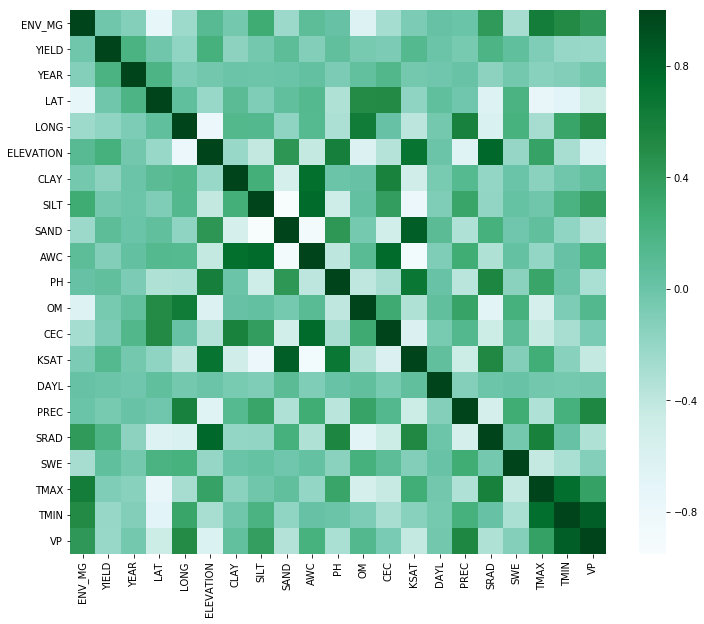

In [7]:
# Repeat the same but just for one HYBRID_ID
# Find out HYBRID_IDs with most observations to draw significant conclusions
print(joined_df.groupby(by='HYBRID_ID').size().sort_values(ascending=False).iloc[:5])

# Choose H1117 hybrid
joined_df_H1117 = joined_df[joined_df['HYBRID_ID']=='H1117']

# Prepare dataframe to redo correlation matrix
joined_df_H1117 = joined_df_H1117.drop(['HYBRID_ID','ENV_ID','HYBRID_MG','ENV_YIELD_MEAN','ENV_YIELD_STD'],axis='columns')
corr_matrix_H1117 = joined_df_H1117.corr()

# Draw heatmap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix_H1117,cmap='BuGn')
top_5 = corr_matrix_H1117['YIELD'].sort_values(ascending=False).iloc[1:6]
bottom_5 = corr_matrix_H1117['YIELD'].sort_values(ascending=True).iloc[0:5]
print(top_5,bottom_5)



HYBRID_ID
H1117    25624
H1037    22486
H1019    14226
H1010    12903
H1025    10602
dtype: int64
 
TOP 5:
OM      0.160760
SWE     0.138553
PREC    0.133931
YEAR    0.117511
LAT     0.081385
Name: YIELD, dtype: float64

BOTTOM 5:
TMAX     -0.237768
TMIN     -0.179694
CLAY     -0.142541
ENV_MG   -0.128135
VP       -0.109547
Name: YIELD, dtype: float64


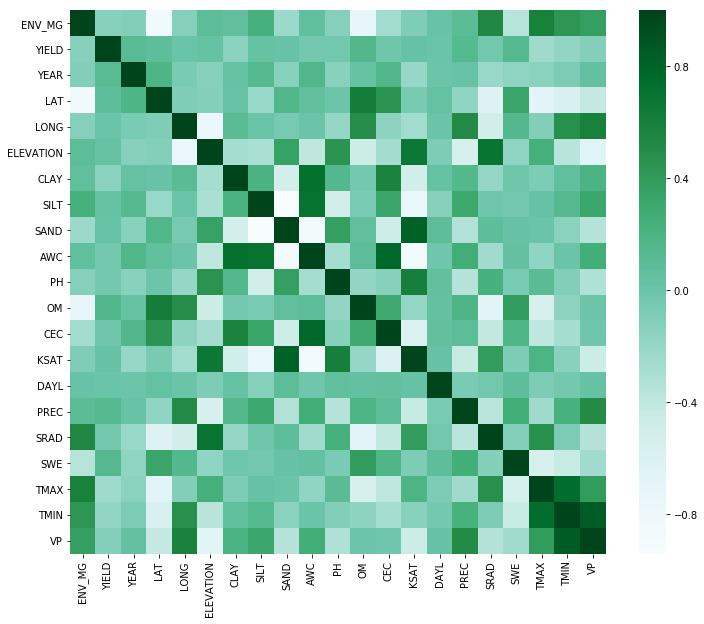

In [8]:
# Repeat the same but just for one HYBRID_ID
# Find out HYBRID_IDs with most observations to draw significant conclusions
print(joined_df.groupby(by='HYBRID_ID').size().sort_values(ascending=False).iloc[:5])

# Choose H1037 hybrid
joined_df_H1037 = joined_df[joined_df['HYBRID_ID']=='H1037']

# Prepare dataframe to redo correlation matrix
joined_df_H1037 = joined_df_H1037.drop(['HYBRID_ID','ENV_ID','HYBRID_MG','ENV_YIELD_MEAN','ENV_YIELD_STD'],axis='columns')
corr_matrix_H1037 = joined_df_H1037.corr()

# Draw heatmap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix_H1037,cmap='BuGn')
top_5 = corr_matrix_H1037['YIELD'].sort_values(ascending=False).iloc[1:6]
bottom_5 = corr_matrix_H1037['YIELD'].sort_values(ascending=True).iloc[0:5]
print(' ')
print('TOP 5:')
print(top_5)
print('')
print('BOTTOM 5:')
print(bottom_5)

In [16]:
performance_data.groupby(by=['HYBRID_ID','ENV_ID']).size()

HYBRID_ID  ENV_ID  
H1000      Env_1018     1
           Env_1034     2
           Env_1042     2
           Env_106      1
           Env_1066     1
           Env_1071     1
           Env_109      1
           Env_112     13
           Env_1230     1
           Env_132      1
           Env_135      1
           Env_1369     2
           Env_1371     2
           Env_1372     2
           Env_154      1
           Env_163      1
           Env_184      1
           Env_189      1
           Env_198     36
           Env_199     12
           Env_200      6
           Env_201      4
           Env_202     31
           Env_206      2
           Env_209     46
           Env_212      1
           Env_213      3
           Env_216     46
           Env_220      1
           Env_221      5
                       ..
H4017      Env_626      1
           Env_752      1
           Env_759      1
           Env_767      1
           Env_772      1
           Env_780      1
           Env_781